# **Importing the libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

# **Importing the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI/Diamond_price_prediction.csv')

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


In [7]:
print(start+'Shape of the Dataframe:'+end,data.shape,'\n')

Shape of the Dataframe: (53940, 11) 



In [8]:
print(start+'Summary Of the dataframe:'+end,'\n')
print(data.info(),'\n')

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None 



# **Variable transformation**

Relacing the unwanted symbol and nan value with numpy nan values which we are going to deal in missing value

In [9]:
data.drop(columns={'Unnamed: 0'}, inplace=True)

In [10]:
print(start+'Checking for Null values in the dataframe:'+end,'\n',data.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64 



# Looking into the values in each **column**

In [11]:
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')

In [12]:
values_in_columns(data)

Column Name--->carat
Number of Unique Values 273 

Count of each unique value 
 0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64 

Column Name--->cut
Number of Unique Values 5 

Count of each unique value 
 Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

Column Name--->color
Number of Unique Values 7 

Count of each unique value 
 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

Column Name--->clarity
Number of Unique Values 8 

Count of each unique value 
 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 

Column Name--->depth
Number of Unique Values 184 

Count of each unique value 
 62.0    2239
61.9    2163
61.8    2077
62.2    2039
62

# Dropping the dupplicates values if **any**

In [13]:
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
    else:
        print("Dataframe doesn't contains dublicate Values")

In [14]:
duplicate(data)

Dataframe contains duplicate values 146
Details of dataframe after droping the Duplicate rows


# Analyzing the **data**

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


# **Univariate Analysis - By BoxPlot**

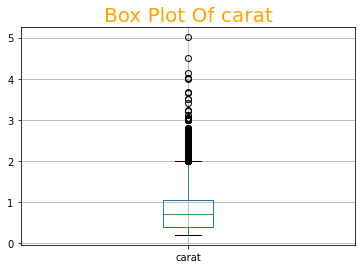

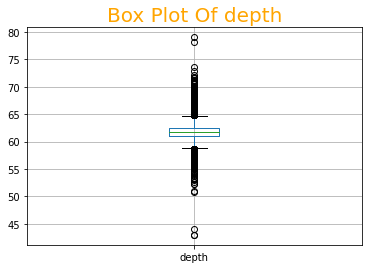

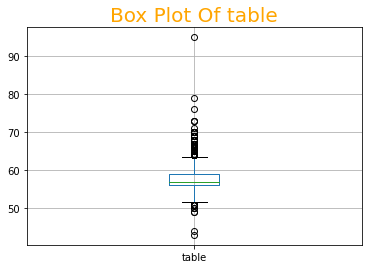

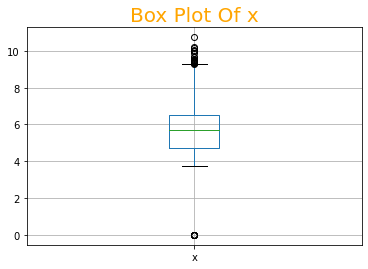

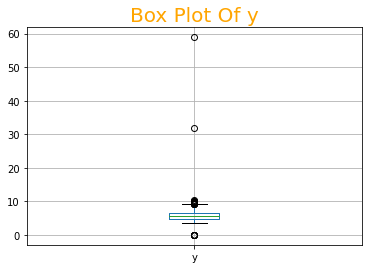

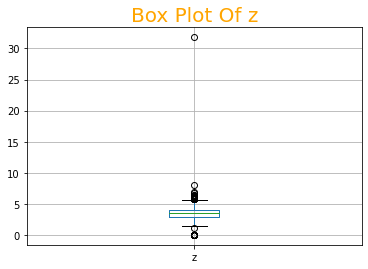

In [16]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']
for predictor in ContinuousCols:
    data.boxplot(column=predictor)
    plt.title(f"Box Plot Of {predictor}" , fontsize=20,
          color="orange")
    plt.show()
    

# Analysis the **data**

In [17]:
numerical_df = data[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7203e52110>,
      dtype=object)

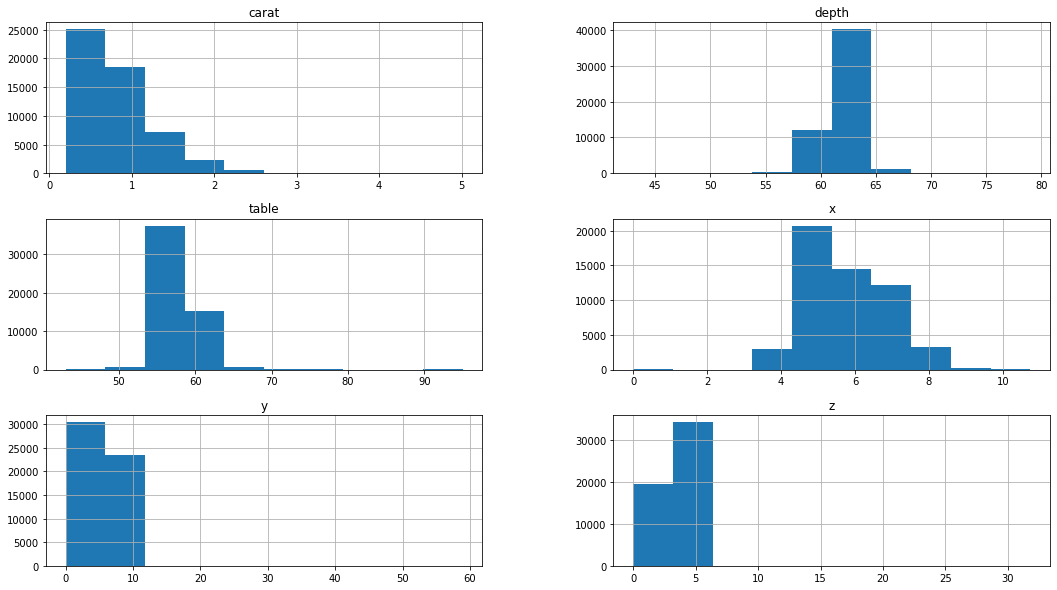

In [18]:
data.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

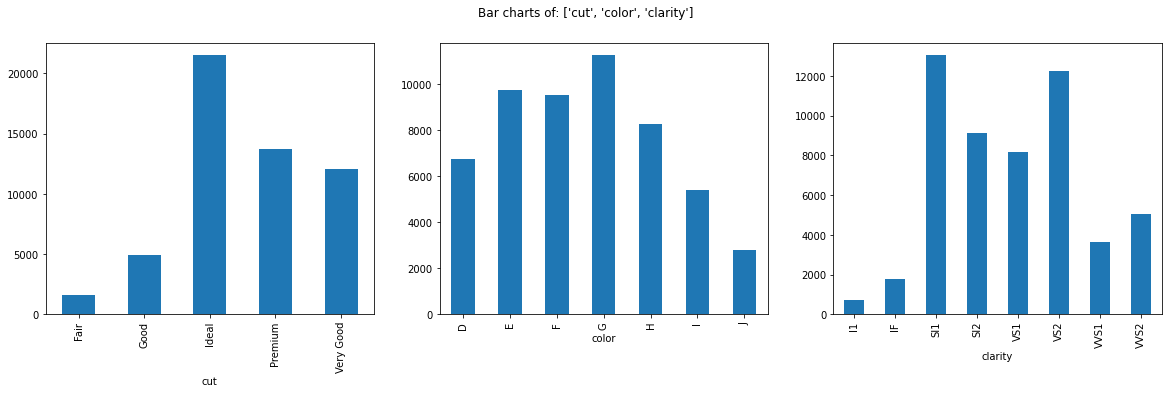

In [19]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
PlotBarCharts(inpData=data, colsToPlot=['cut', 'color', 'clarity'])

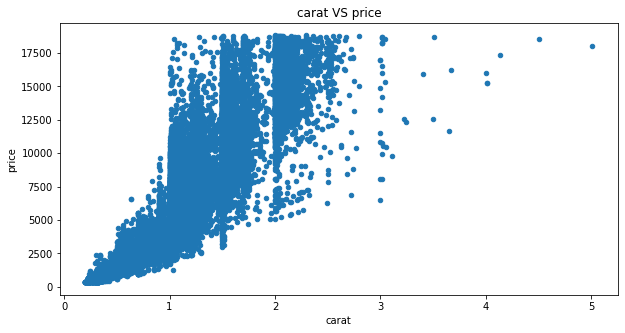

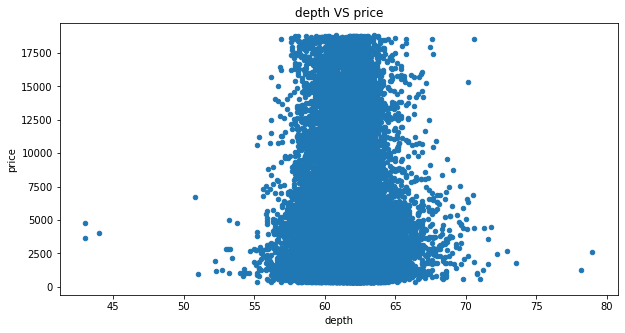

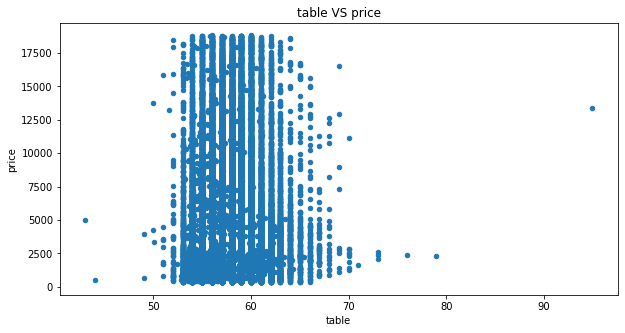

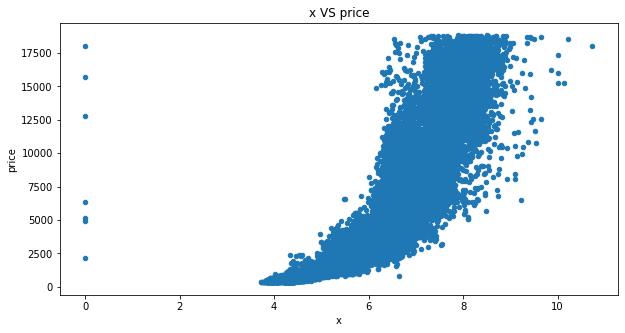

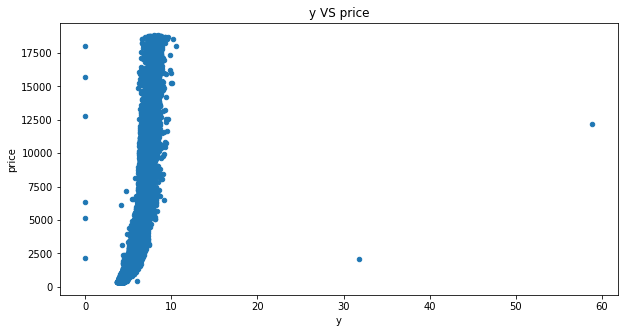

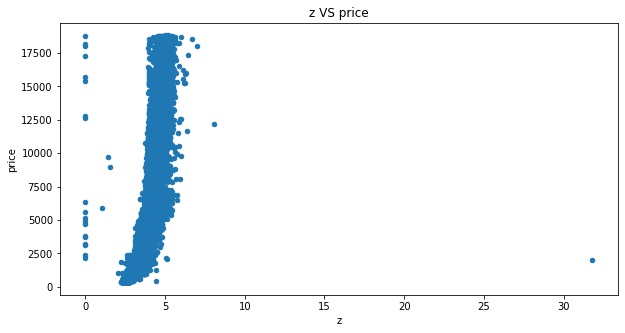

In [20]:
ContinuousCols=['carat','depth','table', 'x','y','z']
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [21]:
corr_matrix = data.corr()
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


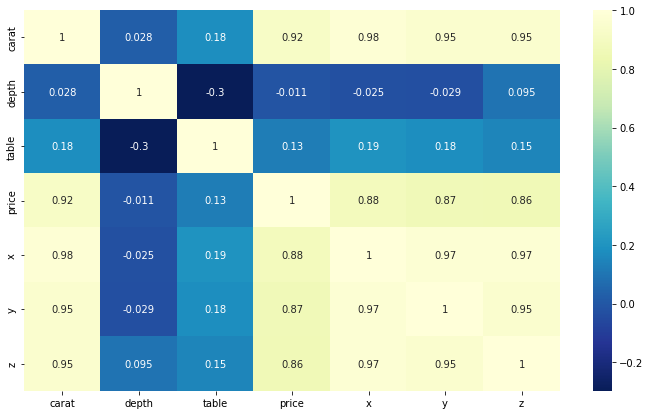

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu_r", annot=True)

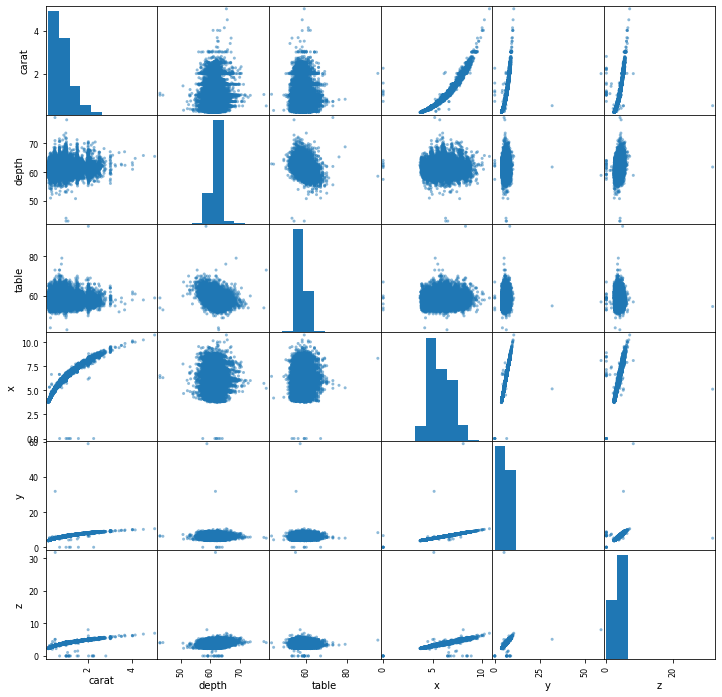

In [23]:
scatter_matrix(data[ContinuousCols],figsize=(12,12))
plt.show()

# Removing **oultier**

In [24]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [25]:
data = data[(data["depth"] < 75) & (data["depth"] > 45)]
data = data[(data["table"] < 80) & (data["table"] > 40)]
data = data[(data["carat"] <10)]
data = data[(data["x"]<40)]
data = data[(data["y"]<40)]
data = data[(data["z"]<40)&(data["z"]>2)]

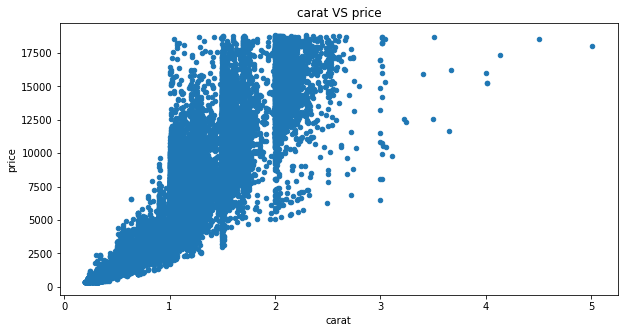

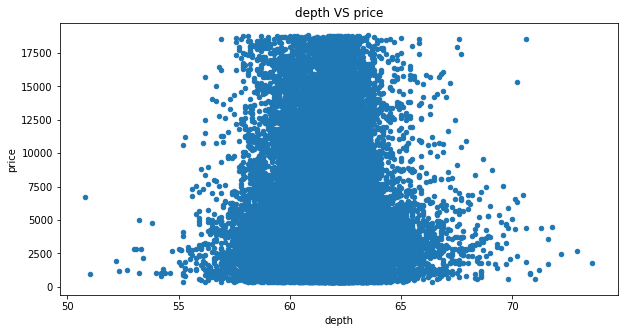

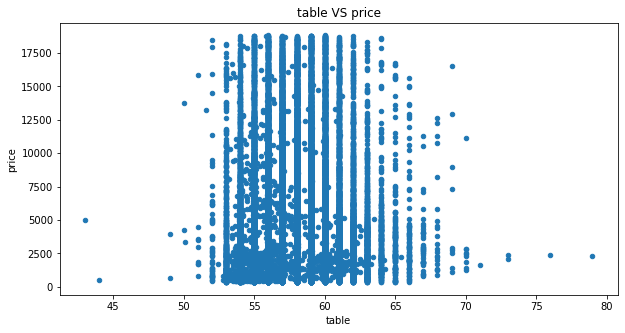

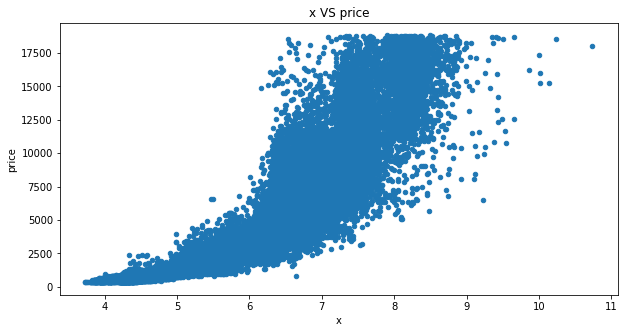

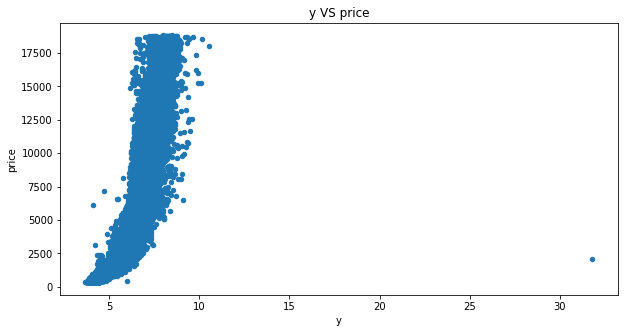

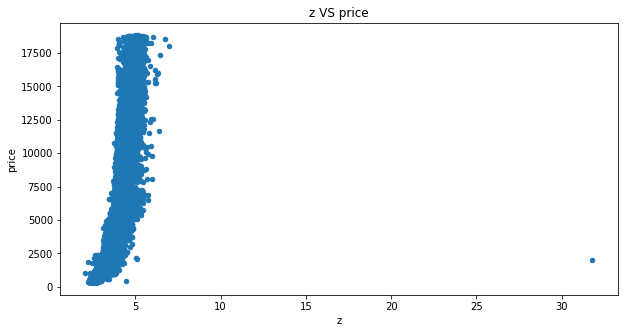

In [26]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [28]:
data.describe()

,carat,depth,table,price,x,y,z
count,53765.000000,53765.000000,53765.000000,53765.000000,53765.000000,53765.000000,53765.000000
mean,0.797449,61.748783,57.457110,3930.714349,5.731383,5.733773,3.539922
std,0.473130,1.419283,2.226326,3985.750608,1.118548,1.116131,0.701568
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


In [39]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

Categorical variables:
['cut', 'color', 'clarity']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [45]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [50]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(40323, 9) (40323,)
(13442, 9) (13442,)


In [47]:
poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
poly_train

array([[ 1.    ,  1.61  ,  3.    , ..., 56.7009, 34.9392, 21.5296],
       [ 1.    ,  0.53  ,  2.    , ..., 27.7729, 17.1802, 10.6276],
       [ 1.    ,  0.43  ,  2.    , ..., 23.7169, 14.7561,  9.1809],
       ...,
       [ 1.    ,  0.39  ,  4.    , ..., 23.2324, 13.7852,  8.1796],
       [ 1.    ,  1.23  ,  3.    , ..., 45.8329, 28.8402, 18.1476],
       [ 1.    ,  0.59  ,  2.    , ..., 29.0521, 17.8409, 10.9561]])

In [48]:
pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr=Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr]
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor"}
for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    model_name = pipeline_dict[i]
    Score=pipe.score(X_train, y_train)
    MSE=mean_squared_error(y_train,pipe.predict(X_train))
    RMSE=abs(np.sqrt(MSE))
    print("{} -> score: {}".format(model_name,Score))
    print("{} -> MSE: {}".format(model_name,MSE))
    print("{} -> RMSE: {}".format(model_name,RMSE))

LinearRegression -> score: 0.8857851014193359
LinearRegression -> MSE: 1817713.4824095797
LinearRegression -> RMSE: 1348.2260501894998
Lasso -> score: 0.8857630116611238
Lasso -> MSE: 1818065.0376954847
Lasso -> RMSE: 1348.3564208678226
DecisionTree -> score: 0.9999962197780534
DecisionTree -> MSE: 60.161681918508044
DecisionTree -> RMSE: 7.75639619401356
RandomForest -> score: 0.9973756972676765
RandomForest -> MSE: 41765.39591373631
RandomForest -> RMSE: 204.36583842153343
KNeighbors -> score: 0.973432236741276
KNeighbors -> MSE: 422822.08427249955
KNeighbors -> RMSE: 650.2477099325299
[21:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor -> score: 0.9731597579163301
XGBRegressor -> MSE: 427158.5451014283
XGBRegressor -> RMSE: 653.5736722829556
GradientBoostingRegressor -> score: 0.97316346783732
GradientBoostingRegressor -> MSE: 427099.5022490001
GradientBoostingRegressor -> RMSE: 653.5285014817641

In [ ]:
predictions = pipeline_dt.predict(X_test)
print(predictions)
submission = pd.DataFrame({"Unnamed: 0": test_index, "price": predictions})
submission.to_csv("/content/drive/MyDrive/SHAI/Diamond_Price_Prediction.csv", index=False)